In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
#from scipy.stats import norm

### Ej1:
Dada una imagen y un valor entero: 2, 3 o 4 muestre la imagen obtenida de multiplicarla por alguno de esos valores.

In [2]:
ruta1 = 'Imagenes_para_contraste/asteroid.jpg'
img = cv2.imread(ruta1,cv2.IMREAD_GRAYSCALE)
if img is None: 
    print("Error ruta no valida")
    exit()
#print(img.shape)
#print(np.iinfo(img.dtype).max)
#print()
print(np.iinfo(img.dtype))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



In [3]:
def f1(ruta:str, factor:int): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    img_res = img * factor
    cv2.imshow('Original',img)
    cv2.imshow(f'Multiplicada por {factor}',img_res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
ruta1 = 'Imagenes_para_contraste/asteroid.jpg'
f1(ruta1,6)

### Ej2 
Implementar una función que dada una imagen devuelva su negativo.

In [4]:
def f2(ruta:str): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    negativo = np.iinfo(img.dtype).max - img
    cv2.imshow("Negativo",negativo)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
f2(ruta1)

# Ej3 
Implementar una función que dada una imagen devuelva el histograma de niveles de gris.

In [16]:
def f3(ruta:str, mostrar:bool=False):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bins = np.iinfo(img.dtype).max+1 
    X,Y = img.shape
    histogram = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = img[i,j]
            histogram[gris] += 1
    if mostrar :
        plt.plot(histogram, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,bins-1])
        plt.show()
    return histogram

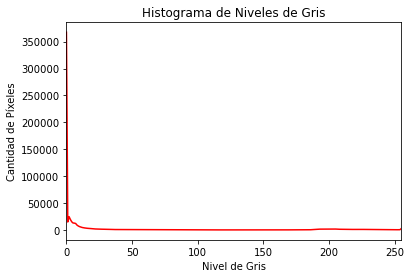

array([3.6746e+05, 1.4849e+04, 2.4799e+04, 1.9518e+04, 1.5320e+04,
       1.3035e+04, 1.2791e+04, 1.2103e+04, 9.1950e+03, 7.4530e+03,
       6.2600e+03, 5.4400e+03, 4.6620e+03, 4.1760e+03, 3.7630e+03,
       3.4170e+03, 3.1400e+03, 2.9820e+03, 2.6350e+03, 2.5590e+03,
       2.2740e+03, 2.0250e+03, 1.8950e+03, 1.8760e+03, 1.7180e+03,
       1.5810e+03, 1.5050e+03, 1.4780e+03, 1.3990e+03, 1.3670e+03,
       1.2880e+03, 1.2330e+03, 1.1580e+03, 1.1110e+03, 1.0610e+03,
       1.0110e+03, 1.0330e+03, 8.6900e+02, 8.0000e+02, 8.2900e+02,
       8.3400e+02, 8.2300e+02, 8.0200e+02, 7.8100e+02, 7.7500e+02,
       7.9500e+02, 7.2100e+02, 7.4200e+02, 7.3900e+02, 7.1200e+02,
       7.2200e+02, 7.0300e+02, 6.6100e+02, 6.3300e+02, 6.4900e+02,
       6.3700e+02, 6.0400e+02, 5.9700e+02, 5.5900e+02, 5.7700e+02,
       5.9900e+02, 4.8400e+02, 4.6700e+02, 4.6400e+02, 5.1900e+02,
       4.5000e+02, 4.5500e+02, 4.5200e+02, 4.1100e+02, 3.9100e+02,
       4.4200e+02, 4.0100e+02, 4.0300e+02, 3.7100e+02, 3.3100e

In [17]:
f3(ruta1,mostrar = True)

### Ej4
Examinando el histograma, implementar una función que devuelva una imagen que tenga aumento del contraste.

In [18]:
U = np.array([(i+1)/256 for i in range(256)]) # cdf de una uniforme. 
def equalization2(distri_x,distri_y): 
    n = len(distri_x)
    print("len X",n)
    print("len Y",len(distri_y))
    res = np.zeros(n)
    for i in range(n): 
        #print(distri_y - distri_x[i])
        res[i] = np.argmax(distri_y - distri_x[i] >= 0)
        #print(res[i])
    return res.astype(int)
def equalization(cdf,l): # l = L - 1
    smin = cdf[0]
    equa = np.floor((cdf-smin)/(1-smin) * l + 0.5).astype(int)
    return equa

In [19]:
def f4(ruta:str):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    hist_original = f3(ruta)
    bins = np.iinfo(img.dtype).max + 1
    cdf = hist_original.cumsum() / img.size
    equa = equalization(cdf,bins-1)
    res_img = img.copy()
    #equa2 = equalization2(cdf,U)
    #print("equalization2",equa2.astype(int))
    #print("equalization",equa)
    X,Y = img.shape
    hist_equ = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            res_img[i,j] = equa[img[i,j]]
    cv2.imshow('Original',img)
    cv2.imshow("equa",res_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    #return res_img 

In [20]:
f4(ruta1)

### Ej5
Implementar una función que dada una imagen y un valor de umbral devuelva una imagen binarizada.

In [9]:
def f5(ruta:str, umbral:int):
    """
    Suponemos que umbral esta en rango correspondiente.
    """
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bin_img = (img >= umbral) * (np.iinfo(np.iinfo(img.dtype)).max+1)
    return bin_img

### Ej6 
Implementar una función que dada una imagen muestre el histograma original y el histograma
equalizado.

In [117]:
x = np.linspace(0, 1, 256)
pdf = norm.pdf(x)

# Normalizamos la PDF para obtener la FDA
fda = np.cumsum(pdf)
fda /= fda[-1]  # Aseguramos que la FDA llegue a 1 al final
U.shape
#len(fda)
#equalization2(np.array([.25,.5,.75,1]),np.array([0,.5,1,1]))
#equalization2(fda,U)
#equalization(fda,255)
#equalization(cdf,255) == equalization2(cdf,U)

(256,)

In [119]:
def f6(ruta:str, mostrar:bool=False):
    hist_original = f3(ruta)
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bins = np.iinfo(img.dtype).max + 1
    cdf = hist_original.cumsum() / img.size
    equa = equalization(cdf,bins-1)
    #equa2 = equalization2(cdf,U)
    #print("equalization2",equa2.astype(int))
    #print("equalization",equa)
    X,Y = img.shape
    hist_equ = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = equa[img[i,j]]
            hist_equ[gris] += 1
    #hist_equ = equalization2(cdf,Y)
    #print(hist_original.size)
    if mostrar :
        plt.plot(hist_equ, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,bins-1])
        plt.show()
    return hist_equ

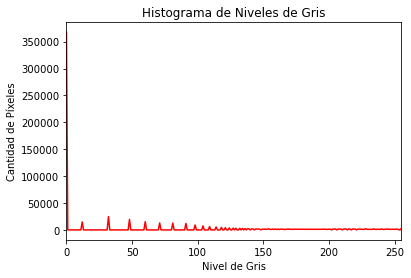

array([367460.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,  14849.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,  24799.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,  19518.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,  15320.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,  13035.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,  12791.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
        12103.,      0.,      0.,      0.,      0.,      0.,      0.,
         9195.,     

In [120]:
f6(ruta1,mostrar=True)
#f3(ruta1,mostrar=True)
#len(Y)

### Ej7 
Dada una imagen a la cual se le ecualizo su histograma, aplicar la ecualizacion del histograma por segunda vez a la misma imagen. Observar el resultado y dar una explicacion de lo sucedido.

In [39]:
def f7(ruta:str, mostrar:bool= False): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    histogram = f3(ruta)
    bins = np.iinfo(img.dtype).max + 1
    cdf = histogram.cumsum() / img.size
    # primera equalizacion 
    equa1 = equalization(cdf,bins-1)
    X,Y = img.shape
    hist_equa = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = equa1[img[i,j]]
            hist_equa[gris] += 1
    cdf2 = hist_equa.cumsum() / img.size
    # segunda equalization
    equa2 = equalization(cdf2,bins-1)
    hist_equa2 = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = equa2[img[i,j]]
            hist_equa2[gris] += 1
    if mostrar :
        plt.plot(hist_equa2, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,bins])
        plt.show()
    return hist_equa2

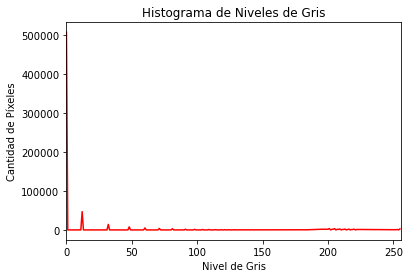

array([5.08223e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 4.69730e+04, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.41450e+04, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 7.79300e+03, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       5.13400e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [40]:
f7(ruta1,mostrar=True)

### Ej8 

In [135]:
img = cv2.imread(ruta1,cv2.IMREAD_GRAYSCALE)
img.size

683000